<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Angie Tatiana Medina Giraldo  <br>
Fecha: 09/04/2022

## Importación de librerias necesarias

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, balanced_accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree

## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
url="https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv"
df = pd.read_csv(url, sep=";")
df.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Explique el problema a resolver. 

Se presenta un problema de clasificación donde se busca predecir la aceptación de un vehículo a partir de diferentes atributos.La variable objetivo es Class, y se busca determinar si el vehículo aceptable, inaceptable, bueno o o muy bueno es a partir de las variables de entrada Buying, Maintennace, Doors, Person, lug boot y safety


## Caracterización del Dataset

A continuación se realiza una descripción de los datos


In [3]:
df.shape
#El dataset contiene 1750 obserervaciones y 7 variables

(1750, 7)

In [4]:
df.columns.values
#El dataset contiene 7 variables

array(['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety',
       'class'], dtype=object)

In [5]:
df.info()
#A continuación se presenta el tipo de datos de cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [6]:
df.isnull().sum()
#El dataset no contiene missing values

Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64

In [7]:
df['class'].value_counts()
# La variable objetivo es Class y presenta 4 valores unacc, acc, good, vgood

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

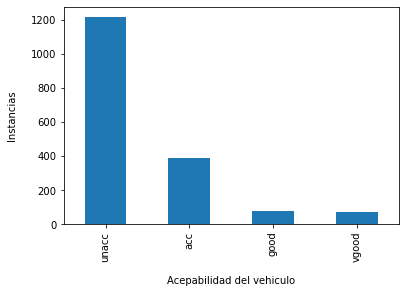

In [8]:
df['class'].value_counts().plot(kind = "bar")
plt.xlabel("Acepabilidad del vehiculo", labelpad=14)
plt.ylabel("Instancias", labelpad=14)
plt.show()

In [9]:
# A continuación los atributos de entrada y la variable objeivo y sus valores

print(df.apply(lambda col: col.unique()))

Buying           [vhigh, high, med, low]
Maintenance      [vhigh, high, med, low]
Doors                   [2, 3, 4, 5more]
Person                      [2, 4, more]
lug_boot               [small, med, big]
safety                  [low, med, high]
class          [unacc, acc, vgood, good]
dtype: object


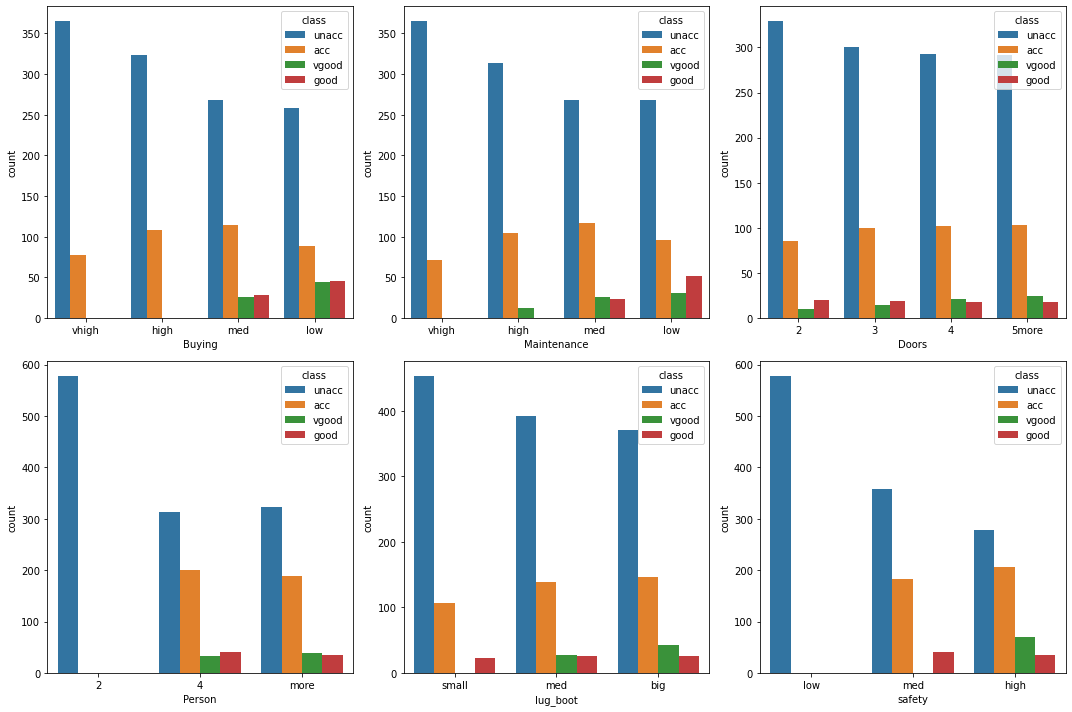

In [10]:
# A continuación se presenta para mayor entendimiento de los datos

def count_plot(df, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(2, 3, indx+1)
        g = sns.countplot(x= df[var], hue= df['class'])
    plt.tight_layout()

features = df.columns.tolist()
features.remove('class')  
count_plot(df, features)

Hallazgos encontrados:


Clases: La variable objetivo es Class  y se refiere a la aceptabilidad de un vehículo, presenta  4 clases, con los siguientes valores tipo categórico: unacc, acc, vgood, good

Número de Instancias total: 1750

Atributos de entrada: Se presentan 6 atributos de entrada, de tipo categórico

+ Buying : vhigh, high, med, low
+ Maintenance: vhigh, high, med, low
+ Doors: 2, 3, 4, 5more
+ Person: 2, 4, more
+ lug_boot: small, med, big
+ safety: low, med, high

Número de instancias pertenecientes a cada clase: 1215 instancias de la clase unacc, 390 de acc, 75 de good y 70 de vgood

El dataset no presenta valores nulos



## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [11]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df[features])
df_encoded = pd.DataFrame(data_encoded, columns=features)

In [12]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df['class'])
df_encoded['class'] = target_encoded

In [13]:
print(df_encoded.apply(lambda col: col.unique()))

Buying         [3.0, 0.0, 2.0, 1.0]
Maintenance    [3.0, 0.0, 2.0, 1.0]
Doors          [0.0, 1.0, 2.0, 3.0]
Person              [0.0, 1.0, 2.0]
lug_boot            [2.0, 1.0, 0.0]
safety              [1.0, 2.0, 0.0]
class                  [2, 0, 3, 1]
dtype: object


In [14]:
df_encoded.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2
1,3.0,3.0,0.0,0.0,2.0,2.0,2
2,3.0,3.0,0.0,0.0,2.0,0.0,2
3,3.0,3.0,0.0,0.0,1.0,1.0,2
4,3.0,3.0,0.0,0.0,1.0,2.0,2


## División del dataset en datos de entrenamiento y datos de test 

In [15]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es
#Se utilizará el 80% de datos para entrenamiento y 20% de datps para testing 

X_train, X_test, Y_train, Y_test = train_test_split(df_encoded.drop('class', axis=1), df_encoded['class'], test_size=0.2, train_size=0.8, random_state=50)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1400, 6) (1400,)
Test set: (350, 6) (350,)


Justifique la selección de las dos propuestas de modelación seleccionadas:

Teniendo en cuenta que se conocen las clases de las instancias, además el tipo de problema (Clasificación),  categoría de las variables entrada (Categóricas), atributos de salida (Variable de salida categórica), se decide implementar un algoritmo de árbol de decisión: (DecisionTreeClassifier) y un algoritmo de Randomforest  (RandomForestClassifier)

## Modelo 1 Arbol de decision


In [16]:
#Código de ajuste del modelo de clasificación 1:  Árbol de decisión

import warnings
warnings.filterwarnings('ignore')

X, Y = df_encoded.drop('class', axis=1), df_encoded['class']
kfold = KFold(3, True, 1)

X = X.to_numpy()
Y = Y.to_numpy()

i=1
for train, test in kfold.split(X):
    
    X_train = X[train]
    X_test = X[test]
    Y_train = Y[train]
    Y_test = Y[test]
    
    Modelo_1= DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
    Modelo_1.fit(X_train, Y_train)
    y_pred1= Modelo_1.predict(X_test)
    
    print('Split number: '+str(i))
    i=i+1
    print('Model 1 Accuracy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred1)))
    
    y_pred1_train= Modelo_1.predict(X_train)
    y_pred1_train
    
    print('Training accuracy: {0:0.4f}'. format(accuracy_score(Y_train, y_pred1_train)))
    
    print('Training set score: {:.4f}'.format(Modelo_1.score(X_train, Y_train)))
    print('Test set score: {:.4f}'.format(Modelo_1.score(X_test, Y_test)))
    
    print(classification_report(Y_train, y_pred1_train, target_names = list(df['class'].unique())))
    
    

Split number: 1
Model 1 Accuracy: 0.8784
Training accuracy: 0.8954
Training set score: 0.8954
Test set score: 0.8784
              precision    recall  f1-score   support

       unacc       0.73      0.90      0.81       261
         acc       0.45      0.31      0.37        45
       vgood       1.00      0.92      0.96       812
        good       0.72      1.00      0.83        48

    accuracy                           0.90      1166
   macro avg       0.73      0.78      0.74      1166
weighted avg       0.91      0.90      0.90      1166

Split number: 2
Model 1 Accuracy: 0.8851
Training accuracy: 0.8886
Training set score: 0.8886
Test set score: 0.8851
              precision    recall  f1-score   support

       unacc       0.73      0.88      0.80       259
         acc       0.45      0.27      0.34        56
       vgood       0.99      0.93      0.96       804
        good       0.70      1.00      0.82        48

    accuracy                           0.89      1167
   ma

In [17]:
print('Model 1 Accuracy Test: {0:0.4f}'. format(accuracy_score(Y_test, y_pred1)))
print('Model 1 Accuracy Training: {0:0.4f}'. format(accuracy_score(Y_train, y_pred1_train)))

Model 1 Accuracy Test: 0.8834
Model 1 Accuracy Training: 0.8963


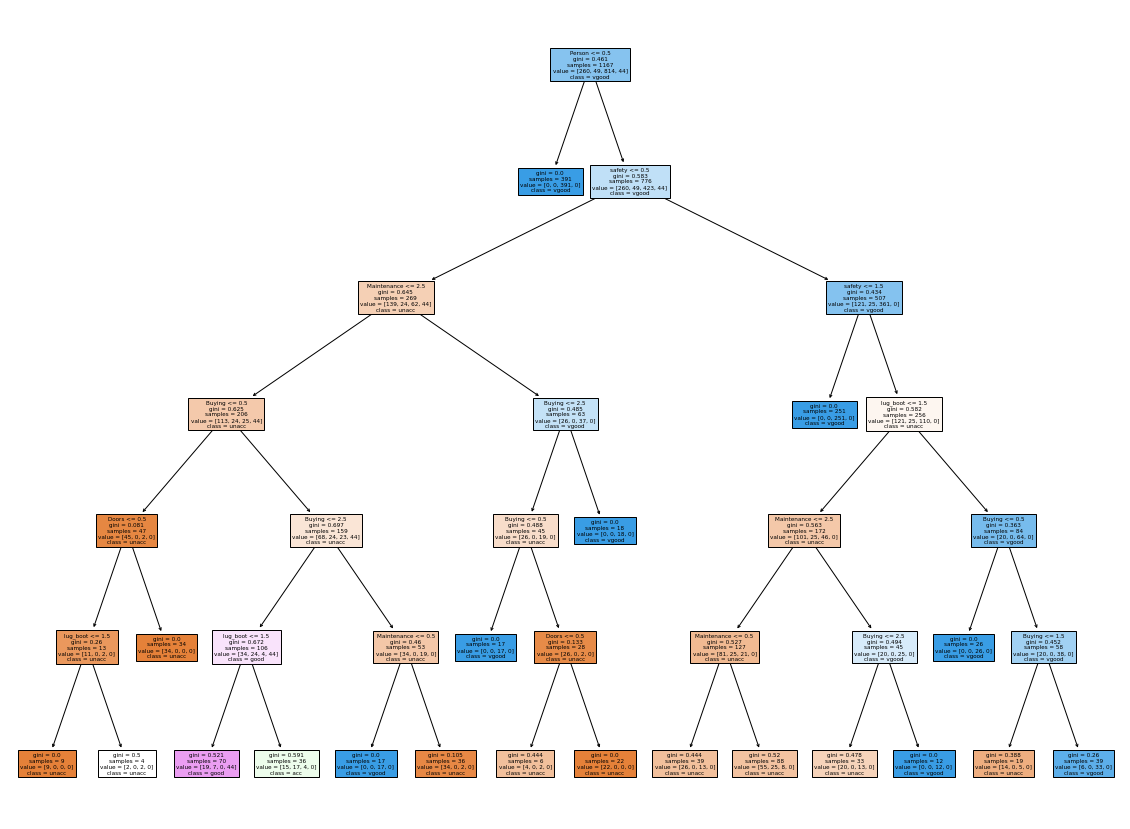

In [18]:
# Grafico del arbol de decision
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(Modelo_1,
feature_names=df.columns.values,
class_names= list(df['class'].unique()), filled=True)


In [19]:
# Importancia de atributos
importance = Modelo_1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.20156
Feature: 1, Score: 0.12328
Feature: 2, Score: 0.00398
Feature: 3, Score: 0.22632
Feature: 4, Score: 0.09797
Feature: 5, Score: 0.34689


## Modelo 2 Random Forest

In [20]:


X, Y = df_encoded.drop('class', axis=1), df_encoded['class']
kfold = KFold(3, True, 1)

X = X.to_numpy()
Y = Y.to_numpy()
 
i=1
for train, test in kfold.split(X):
    
    X_train = X[train]
    X_test = X[test]
    Y_train = Y[train]
    Y_test = Y[test]
    
    Modelo_2= RandomForestClassifier(max_depth = 7, random_state=0)
    Modelo_2.fit(X_train, Y_train)
    y_pred2 = Modelo_2.predict(X_test)
    
    print('Split number: '+str(i))
    i=i+1
    print('Model 1 Accuracy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred2)))
    
    y_pred2_train= Modelo_1.predict(X_train)
    y_pred2_train
    
    print('Training accuracy: {0:0.4f}'. format(accuracy_score(Y_train, y_pred2_train)))
    
    print('Training set score: {:.4f}'.format(Modelo_1.score(X_train, Y_train)))
    print('Test set score: {:.4f}'.format(Modelo_1.score(X_test, Y_test)))

    
    print(classification_report(Y_train, y_pred2_train, target_names = list(df['class'].unique())))

Split number: 1
Model 1 Accuracy: 0.9058
Training accuracy: 0.8928
Training set score: 0.8928
Test set score: 0.8904
              precision    recall  f1-score   support

       unacc       0.74      0.86      0.80       261
         acc       0.45      0.31      0.37        45
       vgood       0.99      0.93      0.96       812
        good       0.72      1.00      0.83        48

    accuracy                           0.89      1166
   macro avg       0.72      0.77      0.74      1166
weighted avg       0.90      0.89      0.89      1166

Split number: 2
Model 1 Accuracy: 0.9297
Training accuracy: 0.8869
Training set score: 0.8869
Test set score: 0.9022
              precision    recall  f1-score   support

       unacc       0.73      0.86      0.79       259
         acc       0.45      0.27      0.34        56
       vgood       0.99      0.93      0.96       804
        good       0.70      1.00      0.82        48

    accuracy                           0.89      1167
   ma

In [21]:
print('Model 2 Accuracy Test: {0:0.4f}'. format(accuracy_score(Y_test, y_pred2)))
print('Model 2 Accuracy Training: {0:0.4f}'. format(accuracy_score(Y_train, y_pred2_train)))

Model 2 Accuracy Test: 0.9091
Model 2 Accuracy Training: 0.8963


In [22]:
# Importancia de atributos
importance = Modelo_2.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.14317
Feature: 1, Score: 0.11453
Feature: 2, Score: 0.03523
Feature: 3, Score: 0.30755
Feature: 4, Score: 0.07429
Feature: 5, Score: 0.32523


## Evaluación de cada modelo

## Evaluación de Modelo 1

In [23]:
# Matrz de confusion Modelo Arboles de decisión
confusion_matrix(Y_test, y_pred1)

array([[113,   6,   8,   3],
       [ 16,   6,   0,   4],
       [ 29,   2, 370,   0],
       [  0,   0,   0,  26]], dtype=int64)

De la matriz de confusion se tienen para la Clase 1

+ Instancias Clasificadas correctamente: 521 
+ Instancias clasificadas incorrectamente: 62
+ TP rate: 0.87
+ FP rate: 0.10

## Evaluación de Modelo 2

In [24]:
#Evaluacion Modelo 2
# Matrz de confusion RandomForest
confusion_matrix(Y_test, y_pred2)

array([[110,   0,  20,   0],
       [ 25,   1,   0,   0],
       [  3,   0, 398,   0],
       [  5,   0,   0,  21]], dtype=int64)

De la matriz de confusion se tienen para la Clase 1

+ Instancias Clasificadas correctamente: 530 
+ Instancias clasificadas incorrectamente: 53
+ TP rate: 0.85
+ FP rate: 0.07



## Comparación del desempeño de modelos

In [25]:
#Metricas de desempeño 

print('Metricas de desempeño Modelo Arbol de decision')
print(classification_report(Y_test, y_pred1, target_names = list(df['class'].unique())))
print('Model 1 accuracy is: {0:0.4f}'. format(accuracy_score(Y_test, y_pred1)))

print('Metricas de desempeño Modelo Random Forest')
print(classification_report(Y_test, y_pred2, target_names = list(df['class'].unique())))
print('Model 2 accuracy is: {0:0.4f}'. format(accuracy_score(Y_test, y_pred2)))



Metricas de desempeño Modelo Arbol de decision
              precision    recall  f1-score   support

       unacc       0.72      0.87      0.78       130
         acc       0.43      0.23      0.30        26
       vgood       0.98      0.92      0.95       401
        good       0.79      1.00      0.88        26

    accuracy                           0.88       583
   macro avg       0.73      0.76      0.73       583
weighted avg       0.89      0.88      0.88       583

Model 1 accuracy is: 0.8834
Metricas de desempeño Modelo Random Forest
              precision    recall  f1-score   support

       unacc       0.77      0.85      0.81       130
         acc       1.00      0.04      0.07        26
       vgood       0.95      0.99      0.97       401
        good       1.00      0.81      0.89        26

    accuracy                           0.91       583
   macro avg       0.93      0.67      0.69       583
weighted avg       0.92      0.91      0.89       583

Model 2 accu

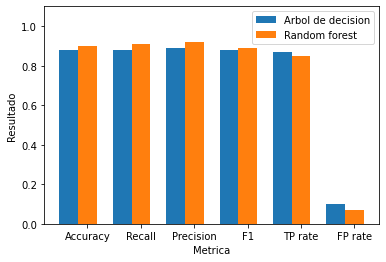

In [26]:
serie_1 = [0.88,0.88,0.89,0.88,0.87,0.10] 
serie_2 = [0.90, 0.91, 0.92, 0.89, 0.85, 0.07]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Arbol de decision')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Random forest')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Accuracy','Recall','Precision','F1','TP rate','FP rate'))
 
plt.ylabel('Resultado')
plt.xlabel('Metrica')
plt.axis([None, None, 0, 1.1])
plt.legend(loc = 'upper right')
plt.show()

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Al momento de evaluar un modelo la métrica de Accuracy o Exactitud nos indica el porcentaje de predicciones correctas que el modelo fue capaz de predecir. De manera general, a partir de los resultados obtenidos para el set de datos empleados ambos modelos presentan buen rendimiento con Accuracy de 0.8834 y 0.9091. Sin embargo, el algoritmo de Randomforest presenta mejores predictores en el proceso de clasificación que los arboles de decisión.

En el modelo con árbol de decisión, el Accuracy del conjunto de entrenamiento fue de 0.8963 mientras que en el conjunto de prueba es 0,8834. De manera similar, en el modelo con Random forest de criterio, el Accuracy del conjunto de entrenamiento es 0.8963 mientras que la precisión del conjunto de prueba es 0.9091. En ambos casos, los resultados para el conjunto de entrenamiento y del conjunto de prueba son comparables, por tanto no se presenta sobreajuste.

El algoritmo de árbol de decision  requiere poco procesamiento previo de los datos  siendo así un modelo que permite obtener resultados fácil y rápido, sin necesidad de conocimientos previos sobre el problema analizado. Sin embargo un pequeño cambio en los datos puede cambiar sustancialmente la estructura de predicción, adicionalmente son propensos al sobreajuste generando unos resultados de Accurcy inferiores a otros métodos. En este ejercicio se comprobó que usar el método de random forest incrementa los valores de Exactitud del modelo; esto es lógico ya que utiliza varios árboles de decisión y por tanto el algoritmo.

De acuerdo con los resultados la variable más importante es safety, seguido de capacidad de personas, precio de compra, seguido de precio de mantenimiento, puertas y el tamaño del maletero es  la última consideración.
